In [87]:


import matplotlib.pyplot as plt
import pandas as pd

features = ["TL", "P", "RF", "SO"]

In [88]:
n_features = len(features)
n_cols = 2
n_rows = -(-n_features // n_cols)

units = {
    "TL": "°C",
    "P": "hPa",
    "RF": "%",
    "SO": "s"
}


def plot_features(name: str, data: pd.DataFrame, file_path: str):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 2 * n_cols))
    axes = axes.flatten()
    for i, feature in enumerate(features):
        ax = axes[i] if n_features > 1 else axes
        ax.boxplot(data[feature], vert=False, patch_artist=True)
        ax.set_title(f"{feature}")
        ax.set_xlabel(f"{units[feature]}")
        ax.set_ylabel(feature)
    plt.tight_layout()
    fig.subplots_adjust(hspace=1.5, wspace=0.2)
    fig.suptitle(name, fontsize=16, fontweight='bold')
    fig.savefig(file_path)
    plt.show()


def print_df_stats(name: str, df: pd.DataFrame):
    max_ts = df.index.max()
    min_ts = df.index.min()
    print(f"{name}")
    print(f"---------------------------------------------------")
    print(f"Start date: {min_ts}")
    print(f"End date: {max_ts}")
    print(f"Size of dataframe: {len(df)}")
    for var in features:
        metric: pd.Series = df[var]
        # p75 = metric.quantile(0.75)
        # p95 = metric.quantile(0.95)
        # p99 = metric.quantile(0.99)
        print(f"    {var}: Min={metric.min()}, Mean={metric.mean()}, Median={metric.median()}, Max={metric.max()}")
    print("\n")


In [89]:
df_vienna = pd.read_pickle("data/raw/zamg_vienna_hourly.pickle")

df_vienna = df_vienna[features]
df_vienna.dropna(inplace=True)

df_vienna

,TL,P,RF,SO
time,,,,
2010-01-01 01:00:00,4.7,971.5,93.0,0.0
2010-01-01 01:10:00,4.8,971.6,92.0,0.0
2010-01-01 01:20:00,4.7,971.5,92.0,0.0
2010-01-01 01:30:00,4.7,971.4,93.0,0.0
2010-01-01 01:40:00,4.7,971.3,93.0,0.0
...,...,...,...,...
2021-12-31 23:10:00,15.3,999.2,59.0,0.0
2021-12-31 23:20:00,15.2,999.3,59.0,0.0
2021-12-31 23:30:00,15.2,999.3,59.0,0.0


Vienna 2010-2021
---------------------------------------------------
Start date: 2010-01-01 01:00:00
End date: 2021-12-31 23:50:00
Size of dataframe: 631146
    TL: Min=-14.1, Mean=12.65017117011489, Median=12.5, Max=39.4
    P: Min=955.7, Mean=995.6065873295034, Median=995.6, Max=1025.3
    RF: Min=8.0, Mean=66.88900138267005, Median=68.0, Max=100.0
    SO: Min=0.0, Mean=858.1486882591349, Median=0.0, Max=3600.0




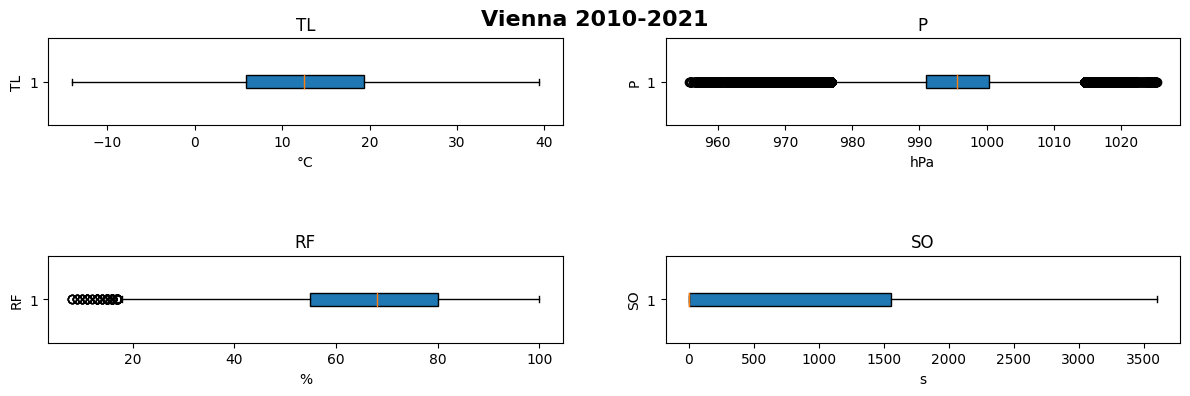

In [90]:
print_df_stats("Vienna 2010-2021", df_vienna)
plot_features("Vienna 2010-2021", df_vienna, "analysis/vienna_2010_2021.png")

In [91]:
df_linz = pd.read_pickle("data/raw/zamg_linz_hourly.pickle")

df_linz = df_linz[features]
df_linz.dropna(inplace=True)

df_linz

,TL,P,RF,SO
time,,,,
2010-01-01 01:00:00,5.5,962.0,96.0,0.0
2010-01-01 01:10:00,5.4,962.0,96.0,0.0
2010-01-01 01:20:00,5.4,962.1,96.0,0.0
2010-01-01 01:30:00,5.4,962.0,97.0,0.0
2010-01-01 01:40:00,5.4,961.9,97.0,0.0
...,...,...,...,...
2021-12-31 23:10:00,10.3,993.4,80.0,0.0
2021-12-31 23:20:00,10.5,993.5,79.0,0.0
2021-12-31 23:30:00,10.5,993.6,78.0,0.0


Linz 2010-2021
---------------------------------------------------
Start date: 2010-01-01 01:00:00
End date: 2021-12-31 23:50:00
Size of dataframe: 631146
    TL: Min=-15.1, Mean=11.021547998931041, Median=10.7, Max=36.5
    P: Min=943.7, Mean=985.8690956345021, Median=986.0, Max=1014.2
    RF: Min=12.0, Mean=75.11351784426002, Median=79.0, Max=100.0
    SO: Min=0.0, Mean=768.046860789738, Median=0.0, Max=3600.0




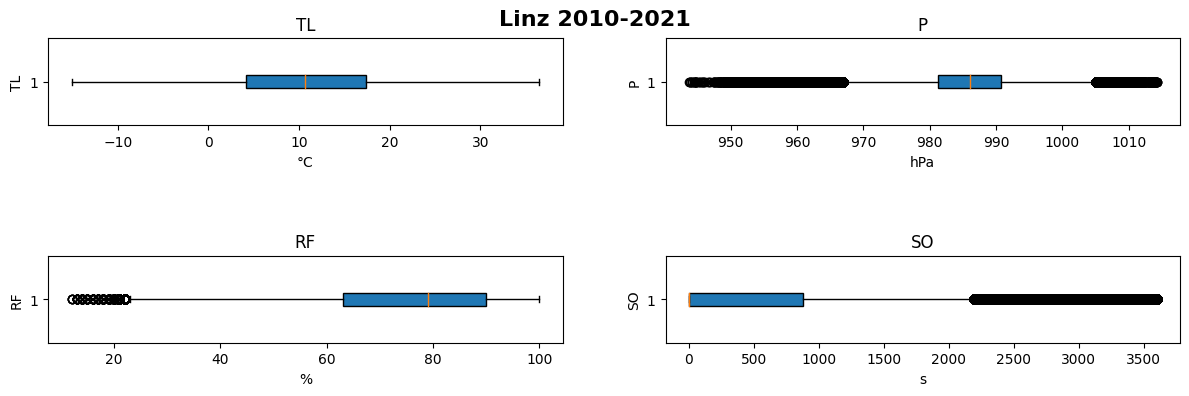

In [92]:
print_df_stats("Linz 2010-2021", df_linz)
plot_features("Linz 2010-2021", df_linz, "analysis/linz_2010_2021.png")

In [93]:
sim_data: pd.DataFrame = df_vienna.loc[df_vienna.index.year >= 2020]

sim_data

,TL,P,RF,SO
time,,,,
2020-01-01 00:00:00,5.0,1012.4,60.0,0.0
2020-01-01 00:10:00,5.0,1012.5,60.0,0.0
2020-01-01 00:20:00,4.9,1012.5,61.0,0.0
2020-01-01 00:30:00,4.9,1012.5,61.0,0.0
2020-01-01 00:40:00,4.9,1012.6,60.0,0.0
...,...,...,...,...
2021-12-31 23:10:00,15.3,999.2,59.0,0.0
2021-12-31 23:20:00,15.2,999.3,59.0,0.0
2021-12-31 23:30:00,15.2,999.3,59.0,0.0


simulation_data
---------------------------------------------------
Start date: 2020-01-01 00:00:00
End date: 2021-12-31 23:50:00
Size of dataframe: 105264
    TL: Min=-7.3, Mean=12.582926419921975, Median=12.1, Max=36.8
    P: Min=964.5, Mean=996.1360161118712, Median=996.3, Max=1025.3
    RF: Min=8.0, Mean=63.974917033997066, Median=66.0, Max=100.0
    SO: Min=0.0, Mean=860.6899794801642, Median=0.0, Max=3600.0




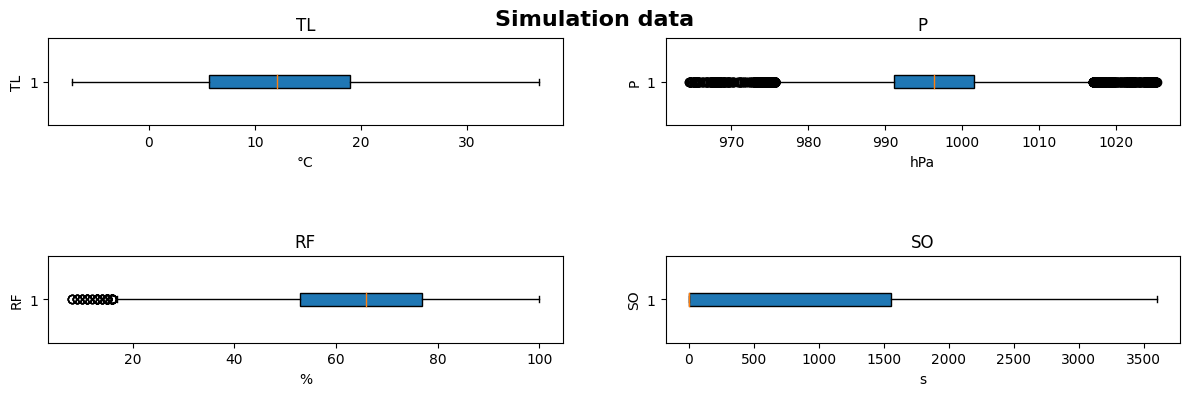

In [94]:
print_df_stats("simulation_data", sim_data)
plot_features("Simulation data", sim_data, "analysis/simulation_data.png")

sim_data.to_pickle("data/simulation_data.pickle")

In [95]:
df_vienna_2010_2019 = df_vienna[(df_vienna.index.year >= 2010) & (df_vienna.index.year <= 2019)]
df_vienna_2010_2019 = df_vienna_2010_2019[features].asfreq('H')

df_vienna_2010_2019

,TL,P,RF,SO
time,,,,
2010-01-01 01:00:00,4.7,971.5,93.0,0.0
2010-01-01 02:00:00,4.7,971.2,93.0,0.0
2010-01-01 03:00:00,4.5,970.9,95.0,0.0
2010-01-01 04:00:00,5.0,970.4,92.0,0.0
2010-01-01 05:00:00,5.1,970.2,91.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,6.1,1011.0,60.0,0.0
2019-12-31 20:00:00,5.6,1011.2,60.0,0.0
2019-12-31 21:00:00,5.5,1011.6,60.0,0.0


df_vienna_2010_2019
---------------------------------------------------
Start date: 2010-01-01 01:00:00
End date: 2019-12-31 23:00:00
Size of dataframe: 87647
    TL: Min=-14.0, Mean=12.663672458840578, Median=12.6, Max=39.4
    P: Min=955.8, Mean=995.5005823599811, Median=995.5, Max=1022.2
    RF: Min=15.0, Mean=67.47228085387977, Median=69.0, Max=100.0
    SO: Min=0.0, Mean=857.6400066935169, Median=0.0, Max=3600.0




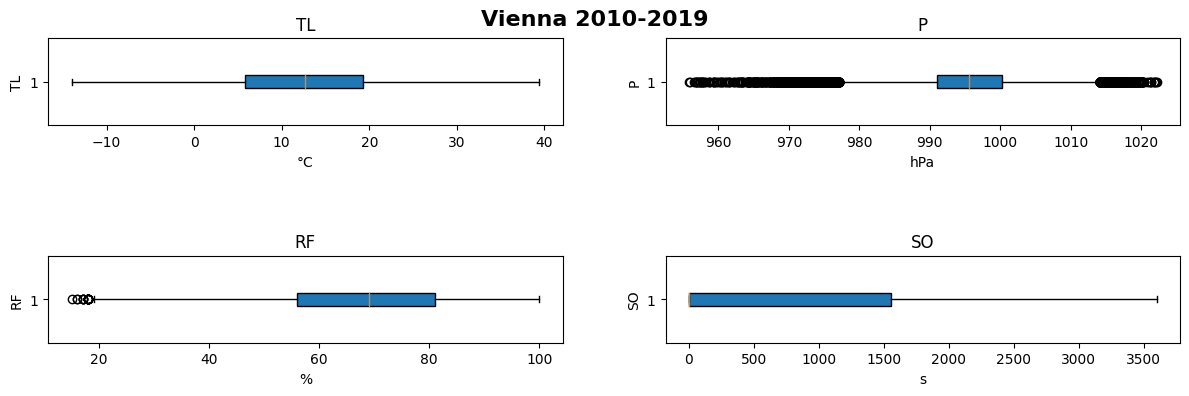

In [96]:
print_df_stats("df_vienna_2010_2019", df_vienna_2010_2019)
plot_features("Vienna 2010-2019", df_vienna_2010_2019, "analysis/vienna_2010_2019.png")

df_vienna_2010_2019.to_pickle("data/vienna_2010_2019.pickle")

In [97]:
df_vienna_2017_2019 = df_vienna[(df_vienna.index.year >= 2017) & (df_vienna.index.year <= 2019)]
df_vienna_2017_2019 = df_vienna_2017_2019[features].asfreq('H')

df_vienna_2017_2019

,TL,P,RF,SO
time,,,,
2017-01-01 00:00:00,-0.7,1006.3,82.0,0.0
2017-01-01 01:00:00,-1.8,1006.0,85.0,0.0
2017-01-01 02:00:00,-1.9,1005.4,83.0,0.0
2017-01-01 03:00:00,-1.5,1004.9,81.0,0.0
2017-01-01 04:00:00,-1.9,1004.2,83.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,6.1,1011.0,60.0,0.0
2019-12-31 20:00:00,5.6,1011.2,60.0,0.0
2019-12-31 21:00:00,5.5,1011.6,60.0,0.0


df_vienna_2017_2019
---------------------------------------------------
Start date: 2017-01-01 00:00:00
End date: 2019-12-31 23:00:00
Size of dataframe: 26280
    TL: Min=-11.0, Mean=13.237279299847794, Median=13.1, Max=38.5
    P: Min=964.9, Mean=995.5161964271409, Median=995.6, Max=1022.2
    RF: Min=16.0, Mean=62.766552511415526, Median=64.0, Max=98.0
    SO: Min=0.0, Mean=898.3532978183662, Median=0.0, Max=3600.0




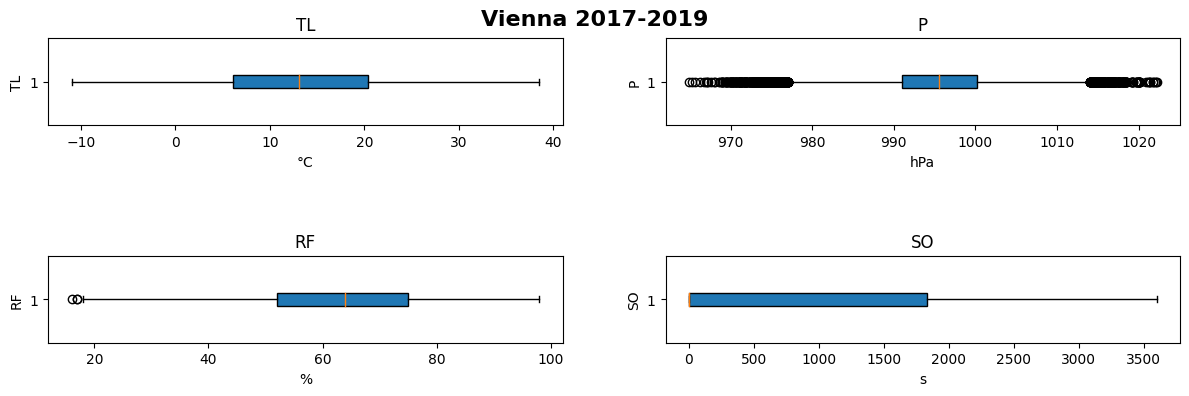

In [98]:
print_df_stats("df_vienna_2017_2019", df_vienna_2017_2019)
plot_features("Vienna 2017-2019", df_vienna_2017_2019, "analysis/vienna_2017_2019.png")

df_vienna_2017_2019.to_pickle("data/vienna_2017_2019.pickle")

In [99]:
df_vienna_2019_2019 = df_vienna[df_vienna.index.year == 2019]
df_vienna_2019_2019 = df_vienna_2019_2019[features].asfreq('H')

df_vienna_2019_2019

,TL,P,RF,SO
time,,,,
2019-01-01 00:00:00,4.4,1009.3,81.0,0.0
2019-01-01 01:00:00,4.7,1009.3,80.0,0.0
2019-01-01 02:00:00,5.2,1008.8,79.0,0.0
2019-01-01 03:00:00,5.3,1007.9,81.0,0.0
2019-01-01 04:00:00,5.6,1006.8,81.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,6.1,1011.0,60.0,0.0
2019-12-31 20:00:00,5.6,1011.2,60.0,0.0
2019-12-31 21:00:00,5.5,1011.6,60.0,0.0


df_vienna_2019_2019
---------------------------------------------------
Start date: 2019-01-01 00:00:00
End date: 2019-12-31 23:00:00
Size of dataframe: 8760
    TL: Min=-6.0, Mean=13.5362100456621, Median=12.6, Max=37.6
    P: Min=964.9, Mean=994.8188812785388, Median=994.5, Max=1022.2
    RF: Min=16.0, Mean=62.60011415525114, Median=64.0, Max=96.0
    SO: Min=0.0, Mean=916.0503424657534, Median=0.0, Max=3600.0




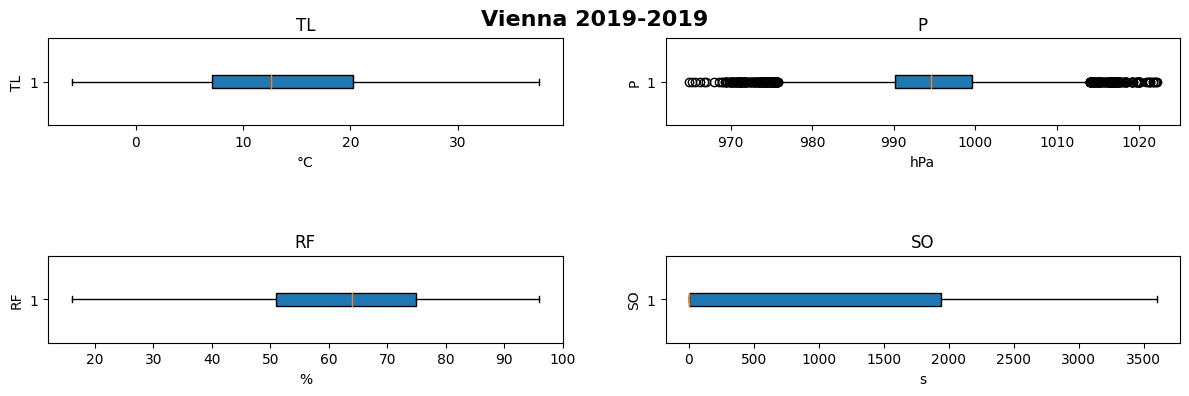

In [100]:
print_df_stats("df_vienna_2019_2019", df_vienna_2019_2019)
plot_features("Vienna 2019-2019", df_vienna_2019_2019, "analysis/vienna_2019_2019.png")

df_vienna_2019_2019.to_pickle("data/vienna_2019_2019.pickle")

In [101]:
selection = (df_vienna_2017_2019.index.month >= 3) & (df_vienna_2017_2019.index.month <= 6)
df_spring_2017_2019: pd.DataFrame = df_vienna_2017_2019[selection]

df_spring_2017_2019

,TL,P,RF,SO
time,,,,
2017-03-01 00:00:00,7.2,980.4,70.0,0.0
2017-03-01 01:00:00,7.1,981.1,69.0,0.0
2017-03-01 02:00:00,7.5,980.8,65.0,0.0
2017-03-01 03:00:00,7.8,981.0,60.0,0.0
2017-03-01 04:00:00,7.6,982.2,62.0,0.0
...,...,...,...,...
2019-06-30 19:00:00,30.7,994.5,35.0,2263.0
2019-06-30 20:00:00,29.2,994.6,40.0,0.0
2019-06-30 21:00:00,28.1,994.7,44.0,0.0


df_vienna_spring_2017_2019
---------------------------------------------------
Start date: 2017-03-01 00:00:00
End date: 2019-06-30 23:00:00
Size of dataframe: 8784
    TL: Min=-10.8, Mean=15.478369763205828, Median=15.4, Max=36.7
    P: Min=971.8, Mean=993.9816873981401, Median=994.1, Max=1015.2
    RF: Min=18.0, Mean=57.22176684881603, Median=58.0, Max=96.0
    SO: Min=0.0, Mean=1133.3847525804492, Median=0.0, Max=3600.0




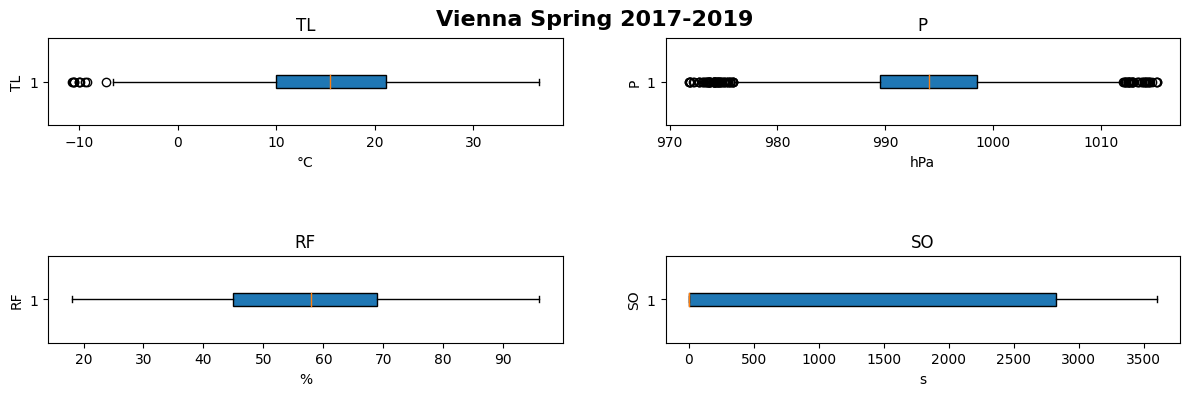

In [102]:
print_df_stats("df_vienna_spring_2017_2019", df_spring_2017_2019)
plot_features("Vienna Spring 2017-2019", df_spring_2017_2019, "analysis/vienna_spring_2017_2019.png")

df_spring_2017_2019.to_pickle("data/vienna_spring_2017_2019.pickle")

In [103]:
selection = (df_vienna_2017_2019.index.month >= 6) & (df_vienna_2017_2019.index.month <= 9)
df_summer_2017_2019: pd.DataFrame = df_vienna_2017_2019[selection]

df_summer_2017_2019

,TL,P,RF,SO
time,,,,
2017-06-01 00:00:00,21.6,998.5,56.0,0.0
2017-06-01 01:00:00,21.5,998.5,55.0,0.0
2017-06-01 02:00:00,21.1,998.2,56.0,0.0
2017-06-01 03:00:00,20.7,998.5,52.0,0.0
2017-06-01 04:00:00,20.4,999.0,51.0,0.0
...,...,...,...,...
2019-09-30 19:00:00,18.3,992.5,43.0,0.0
2019-09-30 20:00:00,17.6,993.2,46.0,0.0
2019-09-30 21:00:00,17.0,993.8,49.0,0.0


df_vienna_summer_2017_2019
---------------------------------------------------
Start date: 2017-06-01 00:00:00
End date: 2019-09-30 23:00:00
Size of dataframe: 8784
    TL: Min=5.2, Mean=22.12764116575592, Median=22.0, Max=38.5
    P: Min=973.5, Mean=995.3431921675774, Median=995.2, Max=1018.4
    RF: Min=16.0, Mean=55.61725865209472, Median=56.0, Max=93.0
    SO: Min=0.0, Mean=1328.0257285974499, Median=73.49999999999977, Max=3600.0




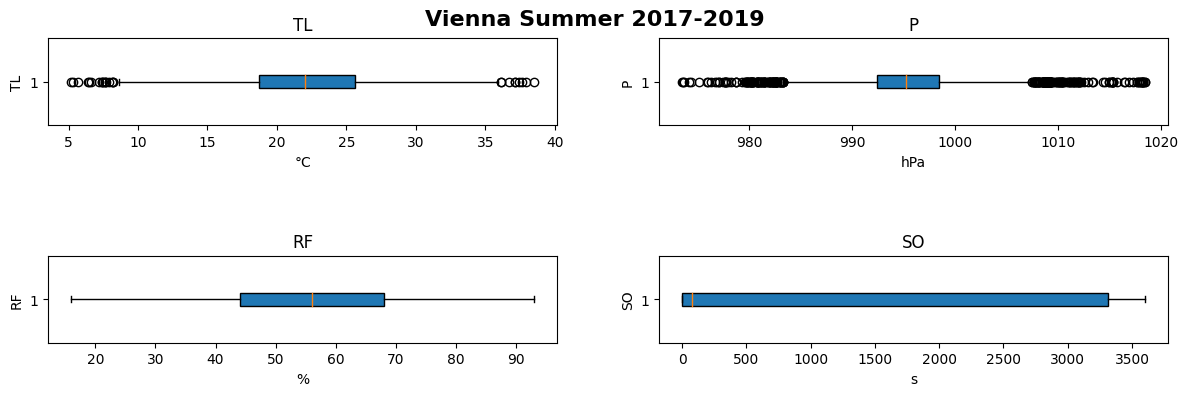

In [104]:
print_df_stats("df_vienna_summer_2017_2019", df_summer_2017_2019)
plot_features("Vienna Summer 2017-2019", df_summer_2017_2019, "analysis/vienna_summer_2017_2019.png")

df_summer_2017_2019.to_pickle("data/vienna_summer_2017_2019.pickle")

In [105]:
selection = (df_vienna_2017_2019.index.month >= 9) & (df_vienna_2017_2019.index.month <= 12)
df_autumn_2017_2019: pd.DataFrame = df_vienna_2017_2019[selection]

df_autumn_2017_2019

,TL,P,RF,SO
time,,,,
2017-09-01 00:00:00,21.2,994.5,73.0,0.0
2017-09-01 01:00:00,20.8,994.3,73.0,0.0
2017-09-01 02:00:00,20.5,994.0,75.0,0.0
2017-09-01 03:00:00,20.2,994.1,75.0,0.0
2017-09-01 04:00:00,20.0,994.1,75.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,6.1,1011.0,60.0,0.0
2019-12-31 20:00:00,5.6,1011.2,60.0,0.0
2019-12-31 21:00:00,5.5,1011.6,60.0,0.0


df_vienna_autumn_2017_2019
---------------------------------------------------
Start date: 2017-09-01 00:00:00
End date: 2019-12-31 23:00:00
Size of dataframe: 8784
    TL: Min=-3.0, Mean=10.870878870673954, Median=10.9, Max=31.0
    P: Min=964.9, Mean=996.3683970856102, Median=996.9, Max=1018.4
    RF: Min=18.0, Mean=69.45901639344262, Median=71.0, Max=98.0
    SO: Min=0.0, Mean=631.8713570127504, Median=0.0, Max=3600.0




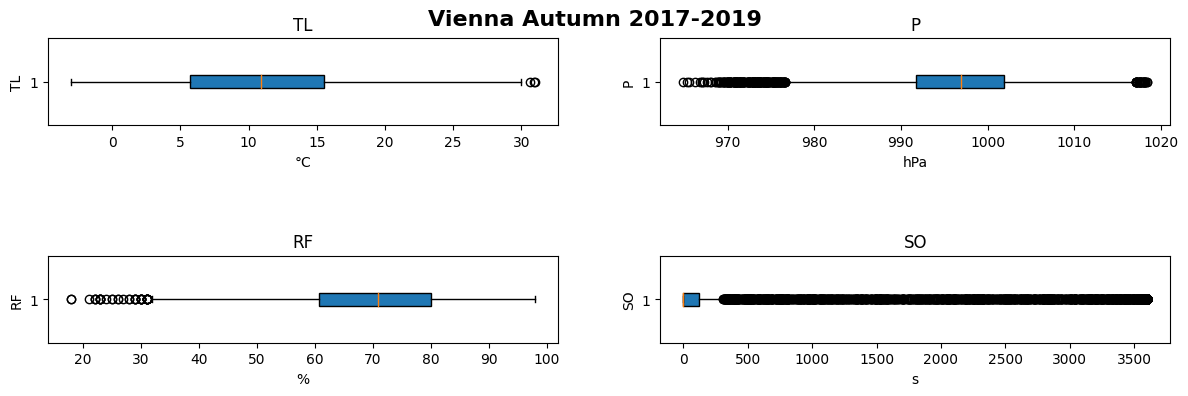

In [106]:
print_df_stats("df_vienna_autumn_2017_2019", df_autumn_2017_2019)
plot_features("Vienna Autumn 2017-2019", df_autumn_2017_2019, "analysis/vienna_autumn_2017_2019.png")

df_autumn_2017_2019.to_pickle("data/vienna_autumn_2017_2019.pickle")

In [107]:
selection = (df_vienna_2017_2019.index.month == 12) | (df_vienna_2017_2019.index.month <= 3)
df_winter_2017_2019: pd.DataFrame = df_vienna_2017_2019[selection]

df_winter_2017_2019

,TL,P,RF,SO
time,,,,
2017-01-01 00:00:00,-0.7,1006.3,82.0,0.0
2017-01-01 01:00:00,-1.8,1006.0,85.0,0.0
2017-01-01 02:00:00,-1.9,1005.4,83.0,0.0
2017-01-01 03:00:00,-1.5,1004.9,81.0,0.0
2017-01-01 04:00:00,-1.9,1004.2,83.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,6.1,1011.0,60.0,0.0
2019-12-31 20:00:00,5.6,1011.2,60.0,0.0
2019-12-31 21:00:00,5.5,1011.6,60.0,0.0


df_vienna_winter_2017_2019
---------------------------------------------------
Start date: 2017-01-01 00:00:00
End date: 2019-12-31 23:00:00
Size of dataframe: 8712
    TL: Min=-11.0, Mean=4.451687327823692, Median=4.3, Max=22.4
    P: Min=964.9, Mean=996.1424012855831, Median=997.0, Max=1022.2
    RF: Min=18.0, Mean=68.03168044077135, Median=69.0, Max=98.0
    SO: Min=0.0, Mean=499.1896235078053, Median=0.0, Max=3600.0




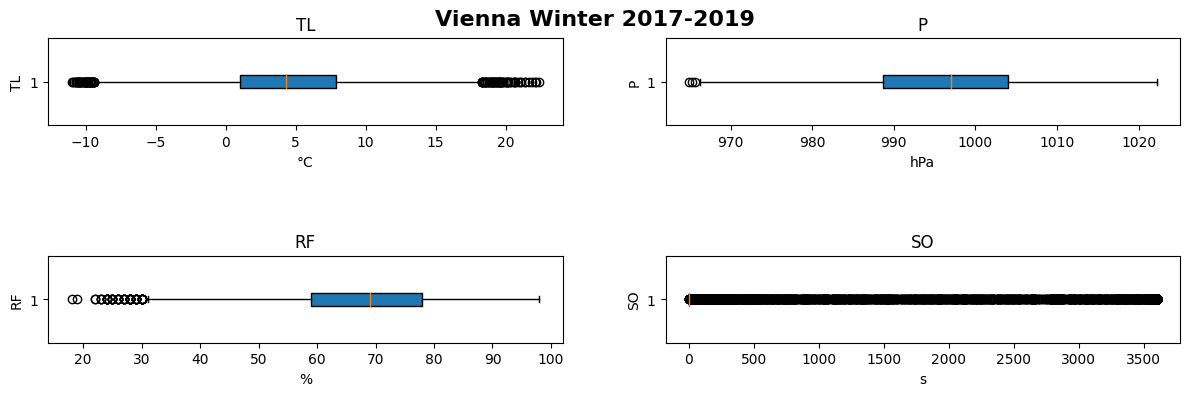

In [108]:
print_df_stats("df_vienna_winter_2017_2019", df_winter_2017_2019)
plot_features("Vienna Winter 2017-2019", df_winter_2017_2019, "analysis/vienna_winter_2017_2019.png")

df_winter_2017_2019.to_pickle("data/vienna_winter_2017_2019.pickle")

In [109]:
df_linz_2010_2019 = df_linz[(df_linz.index.year >= 2010) & (df_linz.index.year <= 2019)]
df_linz_2010_2019 = df_linz_2010_2019[features].asfreq('H')

df_linz_2010_2019

,TL,P,RF,SO
time,,,,
2010-01-01 01:00:00,5.5,962.0,96.0,0.0
2010-01-01 02:00:00,5.4,961.8,97.0,0.0
2010-01-01 03:00:00,5.2,961.4,97.0,0.0
2010-01-01 04:00:00,4.9,960.9,96.0,0.0
2010-01-01 05:00:00,4.1,960.8,96.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,3.5,1002.6,69.0,0.0
2019-12-31 20:00:00,2.8,1002.9,72.0,0.0
2019-12-31 21:00:00,1.3,1003.2,80.0,0.0


df_linz_2010_2019
---------------------------------------------------
Start date: 2010-01-01 01:00:00
End date: 2019-12-31 23:00:00
Size of dataframe: 87647
    TL: Min=-15.1, Mean=11.06048276989895, Median=10.8, Max=36.4
    P: Min=943.7, Mean=985.7573908215153, Median=985.9, Max=1011.5
    RF: Min=12.0, Mean=75.09750856656055, Median=79.0, Max=100.0
    SO: Min=0.0, Mean=767.2864711094885, Median=0.0, Max=3600.0




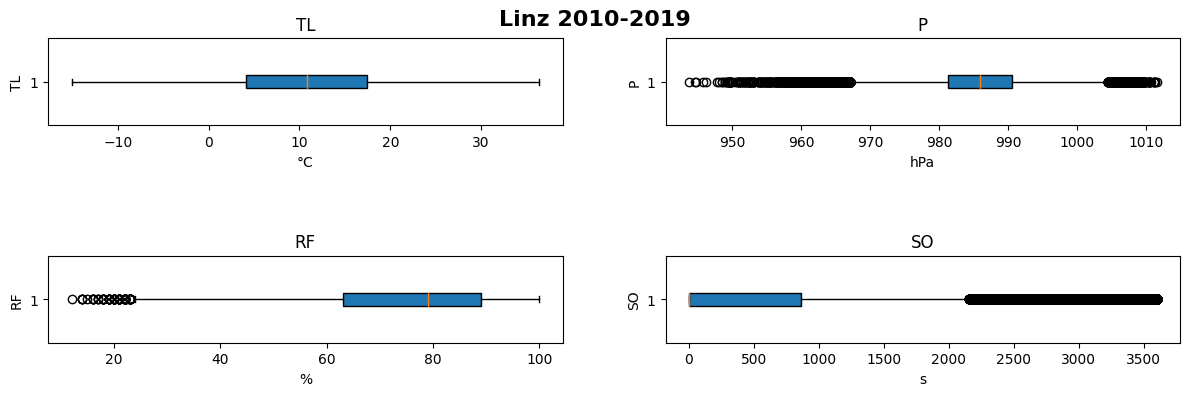

In [110]:
print_df_stats("df_linz_2010_2019", df_linz_2010_2019)
plot_features("Linz 2010-2019", df_linz_2010_2019, "analysis/linz_2010_2019.png")

df_linz_2010_2019.to_pickle("data/linz_2010_2019.pickle")

In [111]:
df_linz_2019_2019 = df_linz[(df_linz.index.year == 2019)]
df_linz_2019_2019 = df_linz_2019_2019[features].asfreq('H')

df_linz_2019_2019

,TL,P,RF,SO
time,,,,
2019-01-01 00:00:00,4.1,1000.1,98.0,0.0
2019-01-01 01:00:00,4.2,1000.1,98.0,0.0
2019-01-01 02:00:00,4.3,999.8,99.0,0.0
2019-01-01 03:00:00,4.5,999.0,100.0,0.0
2019-01-01 04:00:00,4.8,997.9,100.0,0.0
...,...,...,...,...
2019-12-31 19:00:00,3.5,1002.6,69.0,0.0
2019-12-31 20:00:00,2.8,1002.9,72.0,0.0
2019-12-31 21:00:00,1.3,1003.2,80.0,0.0


df_linz_2019_2019
---------------------------------------------------
Start date: 2019-01-01 00:00:00
End date: 2019-12-31 23:00:00
Size of dataframe: 8760
    TL: Min=-6.4, Mean=11.671609589041097, Median=10.9, Max=35.1
    P: Min=953.7, Mean=985.1226255707762, Median=985.4, Max=1011.5
    RF: Min=14.0, Mean=74.2623287671233, Median=79.0, Max=100.0
    SO: Min=0.0, Mean=804.7399543378996, Median=0.0, Max=3600.0




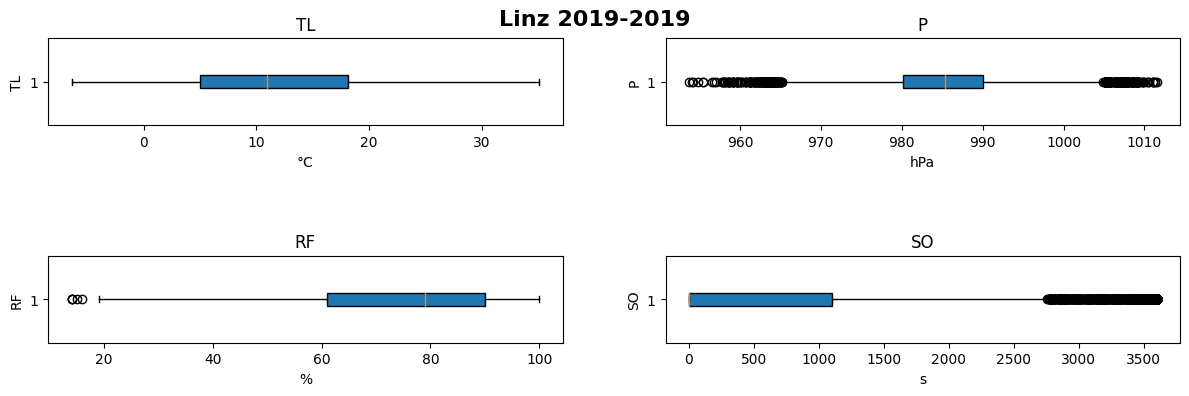

In [112]:
print_df_stats("df_linz_2019_2019", df_linz_2019_2019)
plot_features("Linz 2019-2019", df_linz_2019_2019, "analysis/linz_2019_2019.png")

df_linz_2019_2019.to_pickle("data/linz_2019_2019.pickle")